# Examine permutation based on female sample size

In [1]:
import re
import pandas as pd
from glob import iglob

## Main

In [2]:
df = pd.DataFrame()
for filename in iglob("../../_m/permutation_*/diffExpr_szVctl_FDR05.txt"):
    m = re.search("\d+", filename)
    dt = pd.read_csv(filename, sep='\t', index_col=0)
    dt["Permutation"] = m.group(0)
    df = pd.concat([df, dt], axis=0)
df.to_csv("permutations.csv")
df.shape

(3088, 17)

In [3]:
xx = df.groupby("Permutation").size()\
       .reset_index().rename(columns={0:"DEGs"})\
       .merge(pd.DataFrame({"Permutation": [str(x).zfill(2) for x in range(1,11)]}), 
              on="Permutation", how="outer")\
       .fillna(0).sort_values("Permutation")
print("Median: %f" % xx.DEGs.median())
xx.DEGs.describe()

Median: 147.000000


count      10.000000
mean      308.800000
std       496.270939
min        38.000000
25%        75.000000
50%       147.000000
75%       289.750000
max      1688.000000
Name: DEGs, dtype: float64

<AxesSubplot:>

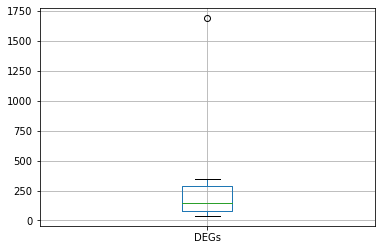

In [4]:
xx.boxplot()

In [5]:
female = pd.read_csv("../../../female_analysis/_m/genes/diffExpr_szVctl_FDR05.txt", sep='\t', index_col=0)
print("There are %d DEGs with females!" % female.shape[0])

There are 922 DEGs with females!
